<a href="https://colab.research.google.com/github/aryaobiswas/ANDROID-JAVA/blob/master/Employee_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all necessary library..
import numpy as np # for array calculations
import pandas as pd # for dataframe manipulations
from scipy.stats import chi2_contingency, ttest_ind

# for visualisation
import matplotlib.pyplot as plt


In [ ]:
# Load dataframe
df = pd.read_csv('Employee Satisfaction Index.csv',on_bad_lines= 'skip')
df

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [ ]:
grouped = df.groupby('Dept')['satisfied'].agg(['mean', 'std', 'count'])
grouped = grouped.rename(columns={'mean': 'Average job satisfaction', 'std': 'Standard deviation', 'count': 'Number of employees'}).reset_index()
grouped

,Dept,Average job satisfaction,Standard deviation,Number of employees
0,HR,0.500000,0.502375,106
1,Marketing,0.463158,0.501286,95
2,Purchasing,0.568807,0.497530,109
3,Sales,0.554348,0.499761,92
4,Technology,0.540816,0.500893,98


In [ ]:
# create a contingency table of Department and Satisfied
contingency_table = pd.crosstab(df['Dept'], df['satisfied'])

# perform the chi-square test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
contingency_table

Chi-square statistic: 2.98
P-value: 0.5618


satisfied,0,1
Dept,,
HR,53,53
Marketing,51,44
Purchasing,47,62
Sales,41,51
Technology,45,53


In [ ]:
marketing = df[df['Dept'] == 'Marketing']['satisfied']
sales = df[df['Dept'] == 'Sales']['satisfied']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(marketing, sales)

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -1.245506542009988
p-value:  0.21452077816069048


In [ ]:
# Define empty lists to store the significant and non-significant results
significant_results = []
non_significant_results = []

# Loop through each pair of departments and calculate the z-test and p-value
for i, dept1 in enumerate(df['Dept'].unique()):
    for j, dept2 in enumerate(df['Dept'].unique()):
        if i != j:
            diff = dept_means[dept1] - dept_means[dept2]
            se = np.sqrt((dept_std[dept1]**2 + dept_std[dept2]**2) / len(df))
            z = diff / se
            p = 2 * (1 - norm.cdf(abs(z)))
            
            # Determine if the result is significant based on the p-value
            if p < 0.05:
                significant_results.append((dept1, dept2, z, p))
            else:
                non_significant_results.append((dept1, dept2, z, p))

# Print the significant results
print('Significant department comparisons and p-values:')
for result in significant_results:
    print(f'{result[0]} vs {result[1]}: p-value = {result[3]:.4f}')

# Print the non-significant results
print('\nNon-significant department comparisons and p-values:')
for result in non_significant_results:
    print(f'{result[0]} vs {result[1]}: p-value = {result[3]:.4f}')


Significant department comparisons and p-values:
HR vs Purchasing: p-value = 0.0296
Technology vs Marketing: p-value = 0.0143
Sales vs Marketing: p-value = 0.0040
Purchasing vs HR: p-value = 0.0296
Purchasing vs Marketing: p-value = 0.0008
Marketing vs Technology: p-value = 0.0143
Marketing vs Sales: p-value = 0.0040
Marketing vs Purchasing: p-value = 0.0008

Non-significant department comparisons and p-values:
HR vs Technology: p-value = 0.1983
HR vs Sales: p-value = 0.0864
HR vs Marketing: p-value = 0.2457
Technology vs HR: p-value = 0.1983
Technology vs Sales: p-value = 0.6689
Technology vs Purchasing: p-value = 0.3753
Sales vs HR: p-value = 0.0864
Sales vs Technology: p-value = 0.6689
Sales vs Purchasing: p-value = 0.6466
Purchasing vs Technology: p-value = 0.3753
Purchasing vs Sales: p-value = 0.6466
Marketing vs HR: p-value = 0.2457


In [ ]:
dept_means = df.groupby('Dept')['satisfied'].mean()
dept_stds = df.groupby('Dept')['satisfied'].std()

# Scatter plot
plt.scatter(dept_means, dept_stds)
plt.xlabel('Mean satisfied')
plt.ylabel('Standard deviation of satisfied')
plt.title('Scatter plot of Dept vs satisfied')
plt.show()

# Bar graph
plt.bar(dept_means.index, dept_means)
plt.xlabel('Dept')
plt.ylabel('Mean satisfied')
plt.title('Bar graph of Dept vs satisfied')
plt.show()

# Line graph
plt.plot(dept_means.index, dept_means)
plt.xlabel('Dept')
plt.ylabel('Mean satisfied')
plt.title('Line graph of Dept vs satisfied')
plt.show()

# Histogram
plt.hist(df['satisfied'])
plt.xlabel('satisfied')
plt.ylabel('Frequency')
plt.title('Histogram of satisfied')
plt.show()






Mean salary:  50416.056
Median salary:  42419.0
Mode salary:  29805
Standard deviation of salary:  23671.39266097125
Variance of salary:  560334830.5098836


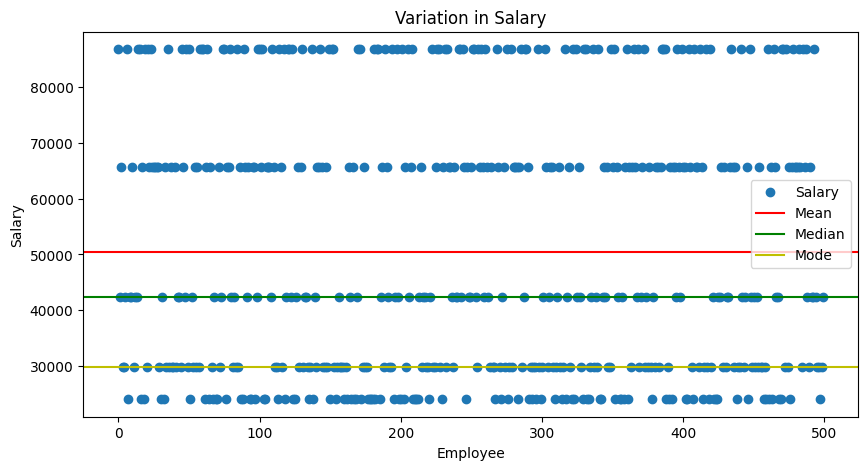

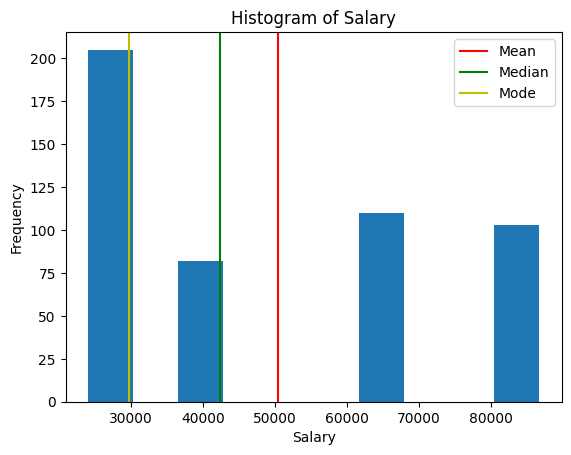

In [ ]:
# Calculate mean, median, mode, standard deviation, and variance of salary column
salary_mean = df['salary'].mean()
salary_median = df['salary'].median()
salary_mode = df['salary'].mode()[0]
salary_std = df['salary'].std()
salary_var = df['salary'].var()

# Print the calculated values
print('Mean salary: ', salary_mean)
print('Median salary: ', salary_median)
print('Mode salary: ', salary_mode)
print('Standard deviation of salary: ', salary_std)
print('Variance of salary: ', salary_var)

# Plot the variation in salary
plt.figure(figsize=(10,5))
plt.plot(df['salary'], marker='o', linestyle='None', label='Salary')
plt.axhline(y=salary_mean, color='r', linestyle='-', label='Mean')
plt.axhline(y=salary_median, color='g', linestyle='-', label='Median')
plt.axhline(y=salary_mode, color='y', linestyle='-', label='Mode')
plt.title('Variation in Salary')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Plot the histogram of salary
plt.hist(df['salary'])
plt.axvline(x=salary_mean, color='r', linestyle='-', label='Mean')
plt.axvline(x=salary_median, color='g', linestyle='-', label='Median')
plt.axvline(x=salary_mode, color='y', linestyle='-', label='Mode')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()